In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import ast

In [2]:
df_dqn_path = 'DQN/df_data_DQN_500.csv'
df_dqn_200_path = 'DQN/df_data_DQN_0.0001_0.99_es.csv'
df_duelingdqn_path = 'DuelingDQN-temp/df_data_DuelingDQN_500.csv'
df_duelingdqn_200_path = 'DuelingDQN-temp/df_data_DuelingDQN_0.0001_0.99_es.csv'

In [3]:
df_dqn = pd.read_csv(df_dqn_path)
df_dqn.drop('Unnamed: 0', axis=1, inplace=True)

df_dqn_200 = pd.read_csv(df_dqn_200_path)

df_duelingdqn = pd.read_csv(df_duelingdqn_path)
df_duelingdqn.drop('Unnamed: 0', axis=1, inplace=True)

df_duelingdqn_200 = pd.read_csv(df_duelingdqn_200_path)

In [4]:
df_dqn['gamma'] = df_dqn['gamma'].apply(lambda x: round(x, 3))
df_duelingdqn['gamma'] = df_duelingdqn['gamma'].apply(lambda x: round(x, 3))

In [5]:
df_duelingdqn

,lr,gamma,scores,avg_scores
0,0.0010,0.990,"[-115.76394022262558, -200.26009493271232, -20...","[-115.76394022262558, -158.01201757766896, -17..."
1,0.0010,0.999,"[-115.76394022262558, -200.26009493271232, -20...","[-115.76394022262558, -158.01201757766896, -17..."
2,0.0001,0.990,"[-115.76394022262558, -200.26009493271232, -20...","[-115.76394022262558, -158.01201757766896, -17..."
3,0.0001,0.999,"[-115.76394022262558, -200.26009493271232, -20...","[-115.76394022262558, -158.01201757766896, -17..."


In [6]:
def plot_comparison(data, title, save_path=None):
    
    plt.figure(figsize=(6, 4), dpi=300)
    for i in range(data.shape[0]):
        row = data.iloc[i,:]
        plt.plot(ast.literal_eval(row['scores']), # convert list of array to array
                 label="lr={} gamma={}".format(row['lr'], row['gamma']))
    plt.xlabel("Episode")
    plt.ylabel("Rewards")
    plt.title(title)
    plt.legend()
    plt.show()
    
    if save_path is not None:
        plt.savefig(save_path)


def plot_avg_comparison(data, title, save_path=None):
    
    plt.figure(figsize=(6, 4), dpi=300)
    for i in range(data.shape[0]):
        row = data.iloc[i,:]
        plt.plot(ast.literal_eval(row['avg_scores']), # convert list of array to array
                 label="lr={} gamma={}".format(row['lr'], row['gamma']))
    plt.xlabel("Episode")
    plt.ylabel("Average rewards over 100 episodes")
    plt.title(title)
    plt.legend()
    plt.show()
    
    if save_path is not None:
        plt.savefig(save_path)

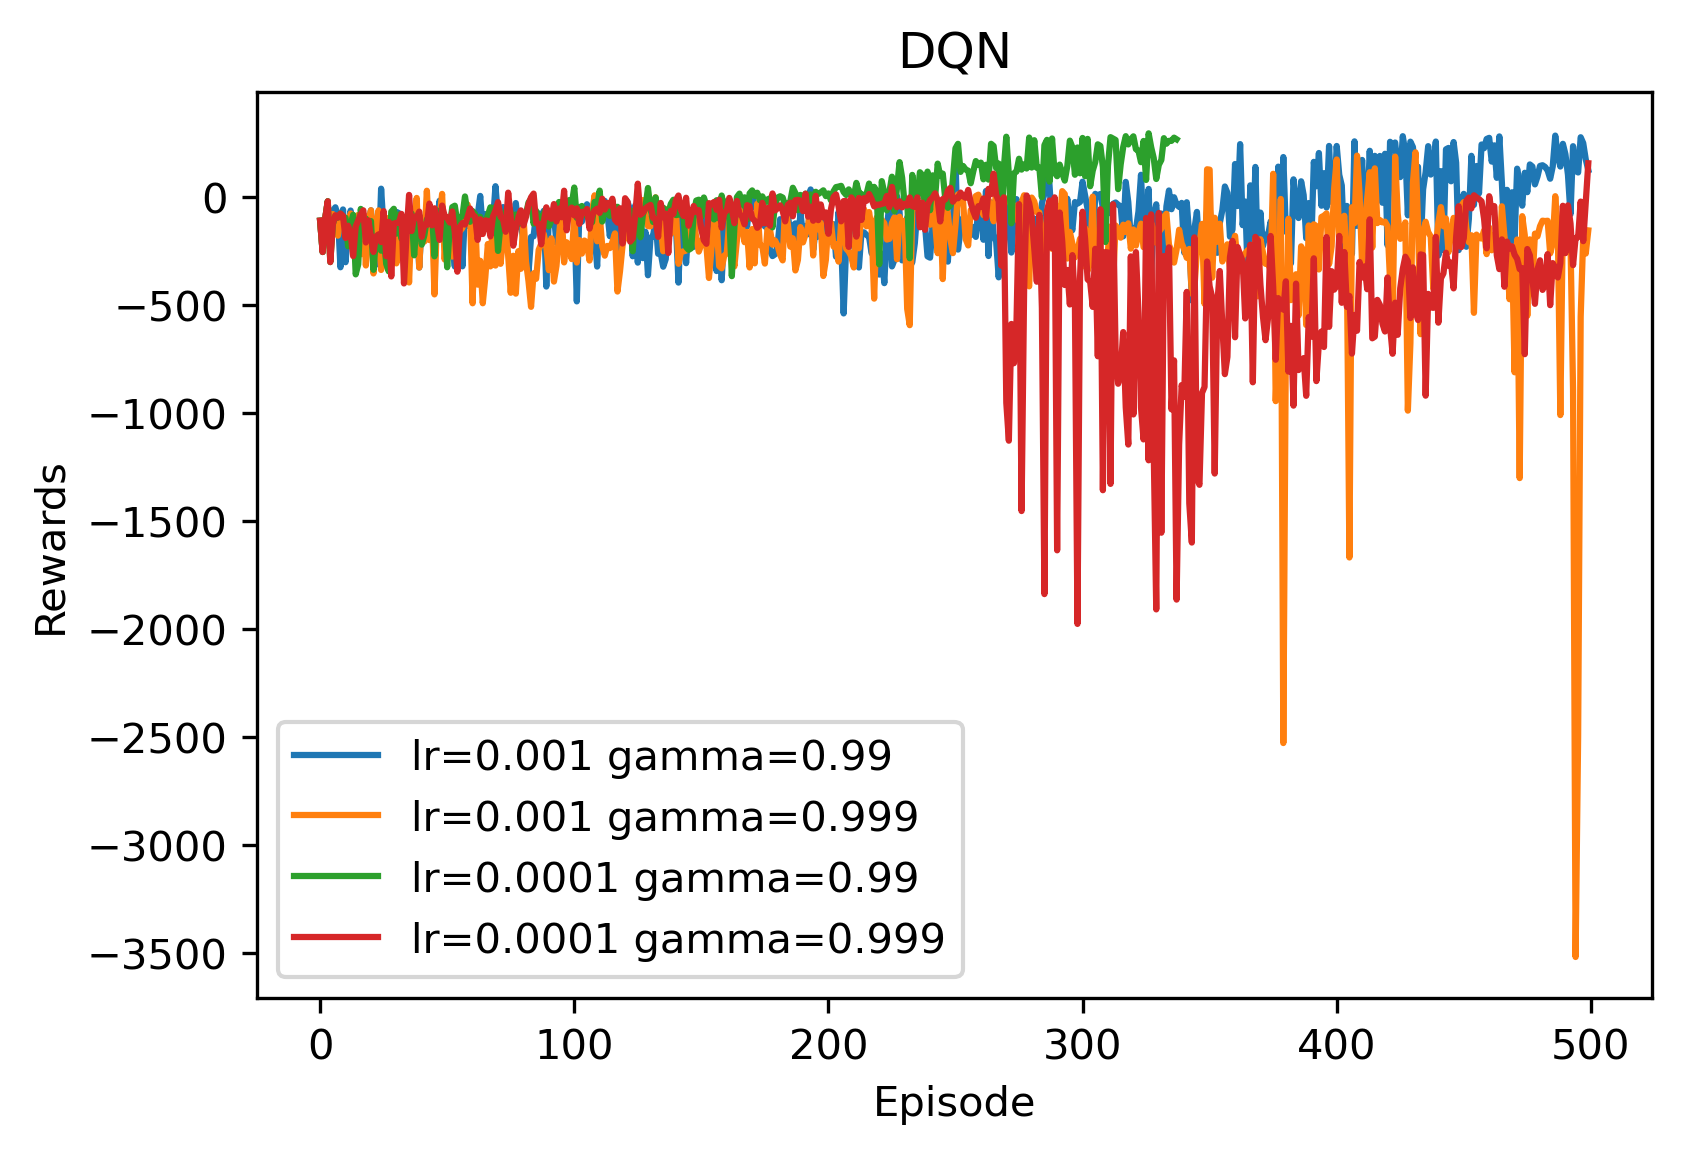

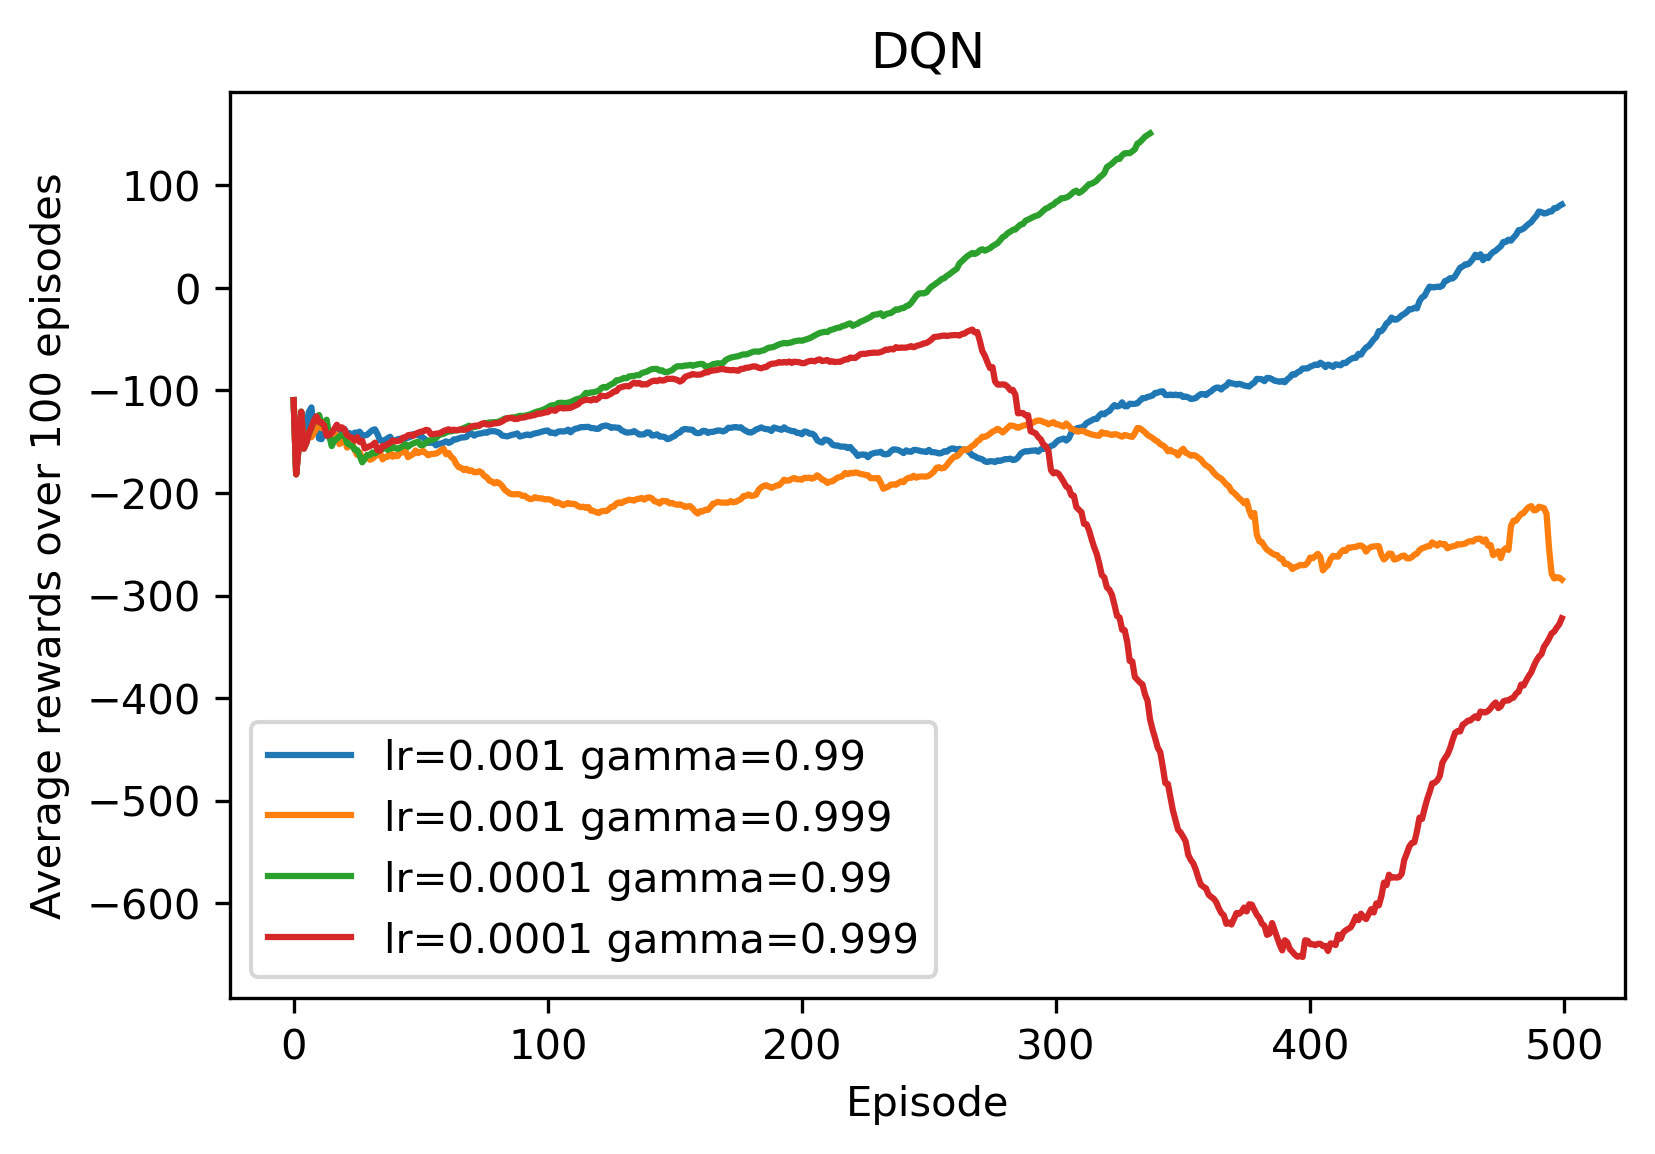

In [7]:
plot_comparison(df_dqn, "DQN")
plot_avg_comparison(df_dqn, "DQN")

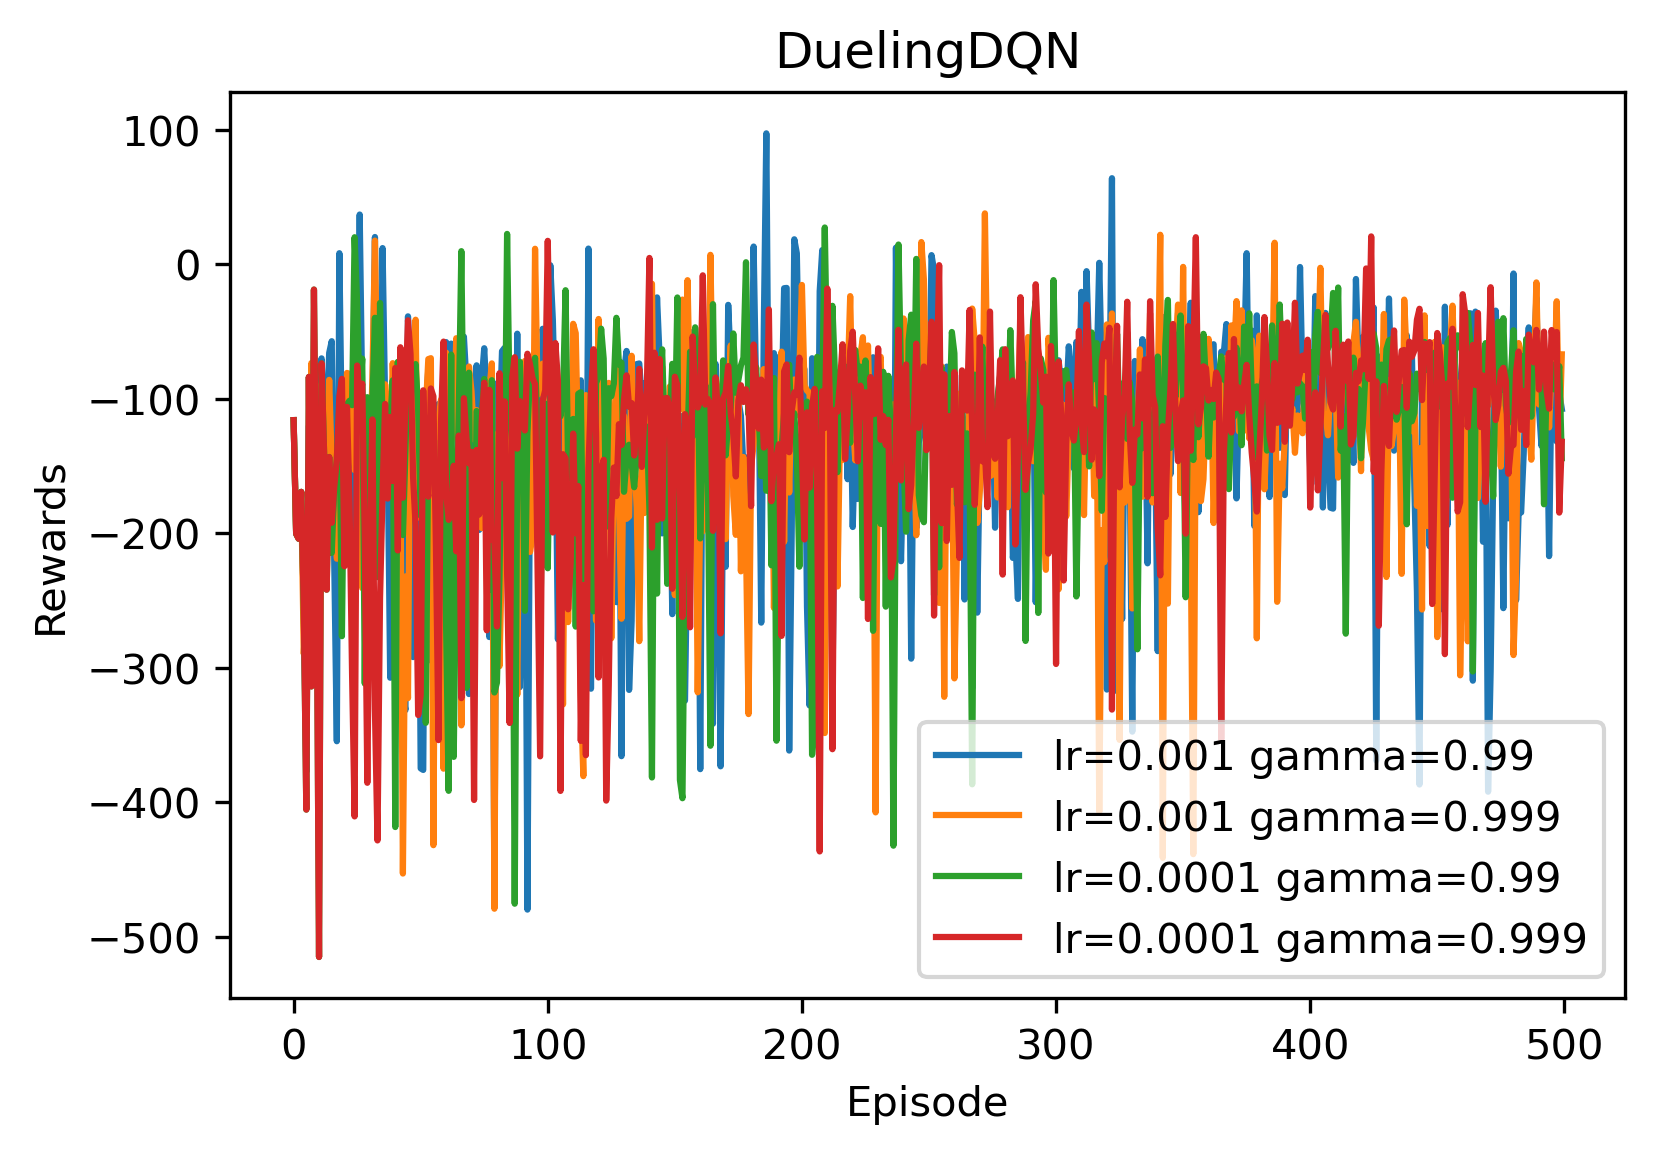

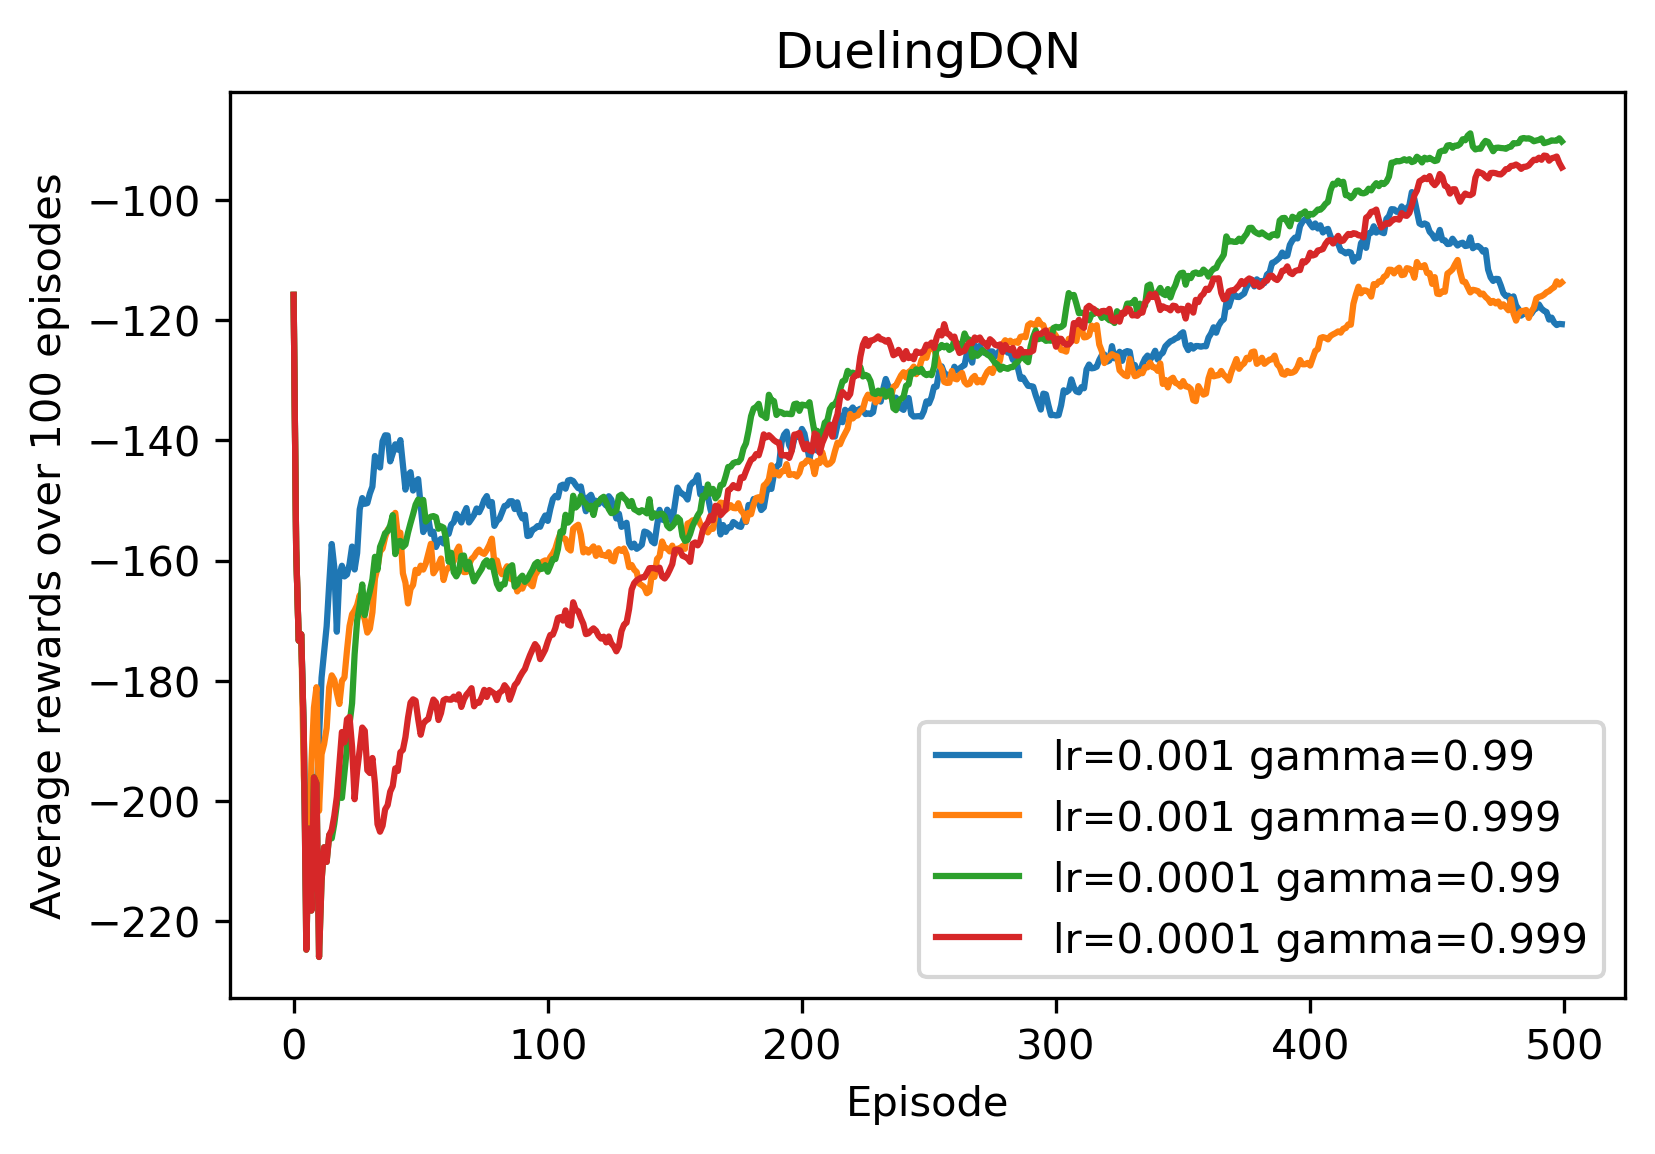

In [8]:
plot_comparison(df_duelingdqn, "DuelingDQN")
plot_avg_comparison(df_duelingdqn, "DuelingDQN")

In [9]:
def plot_single(data, title, save_path=None):
    
    plt.figure(figsize=(12, 6), dpi=300)
    plt.plot(data)
    plt.xlabel("Episode")
    plt.ylabel("Average rewards over 100 episodes")
    plt.title(title)
    plt.show()
    
    if save_path is not None:
        plt.savefig(save_path)

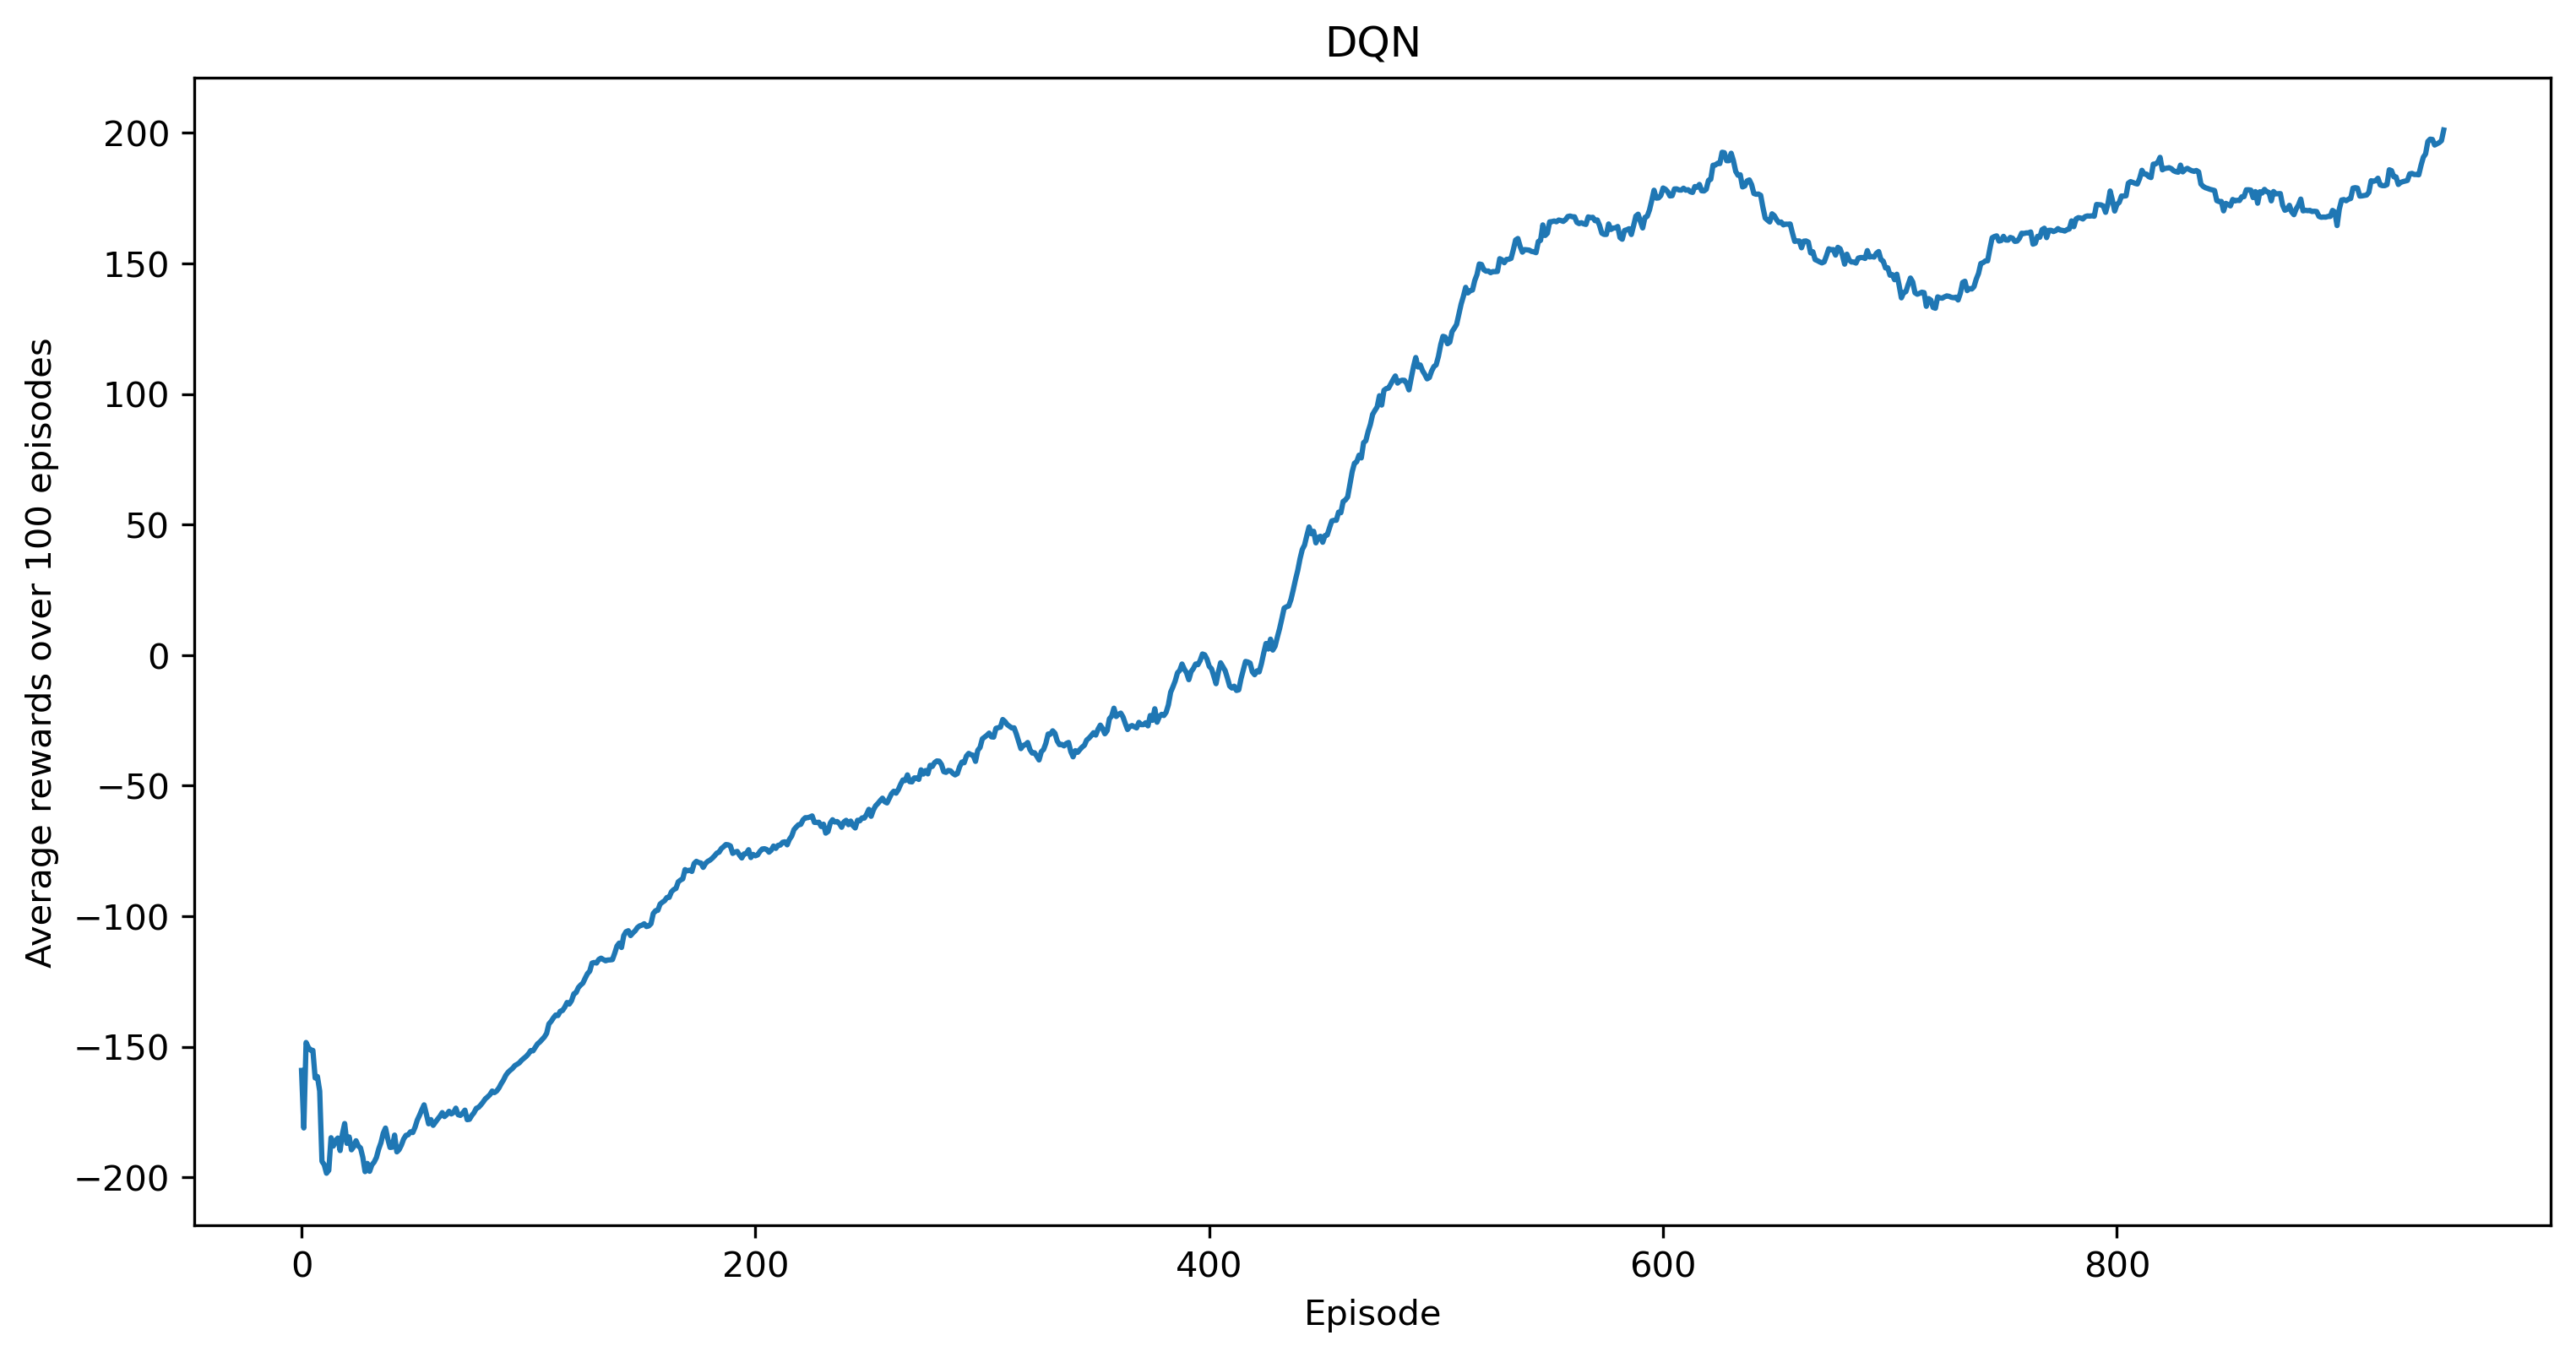

In [10]:
plot_single(df_dqn_200['avg_scores'], "DQN")

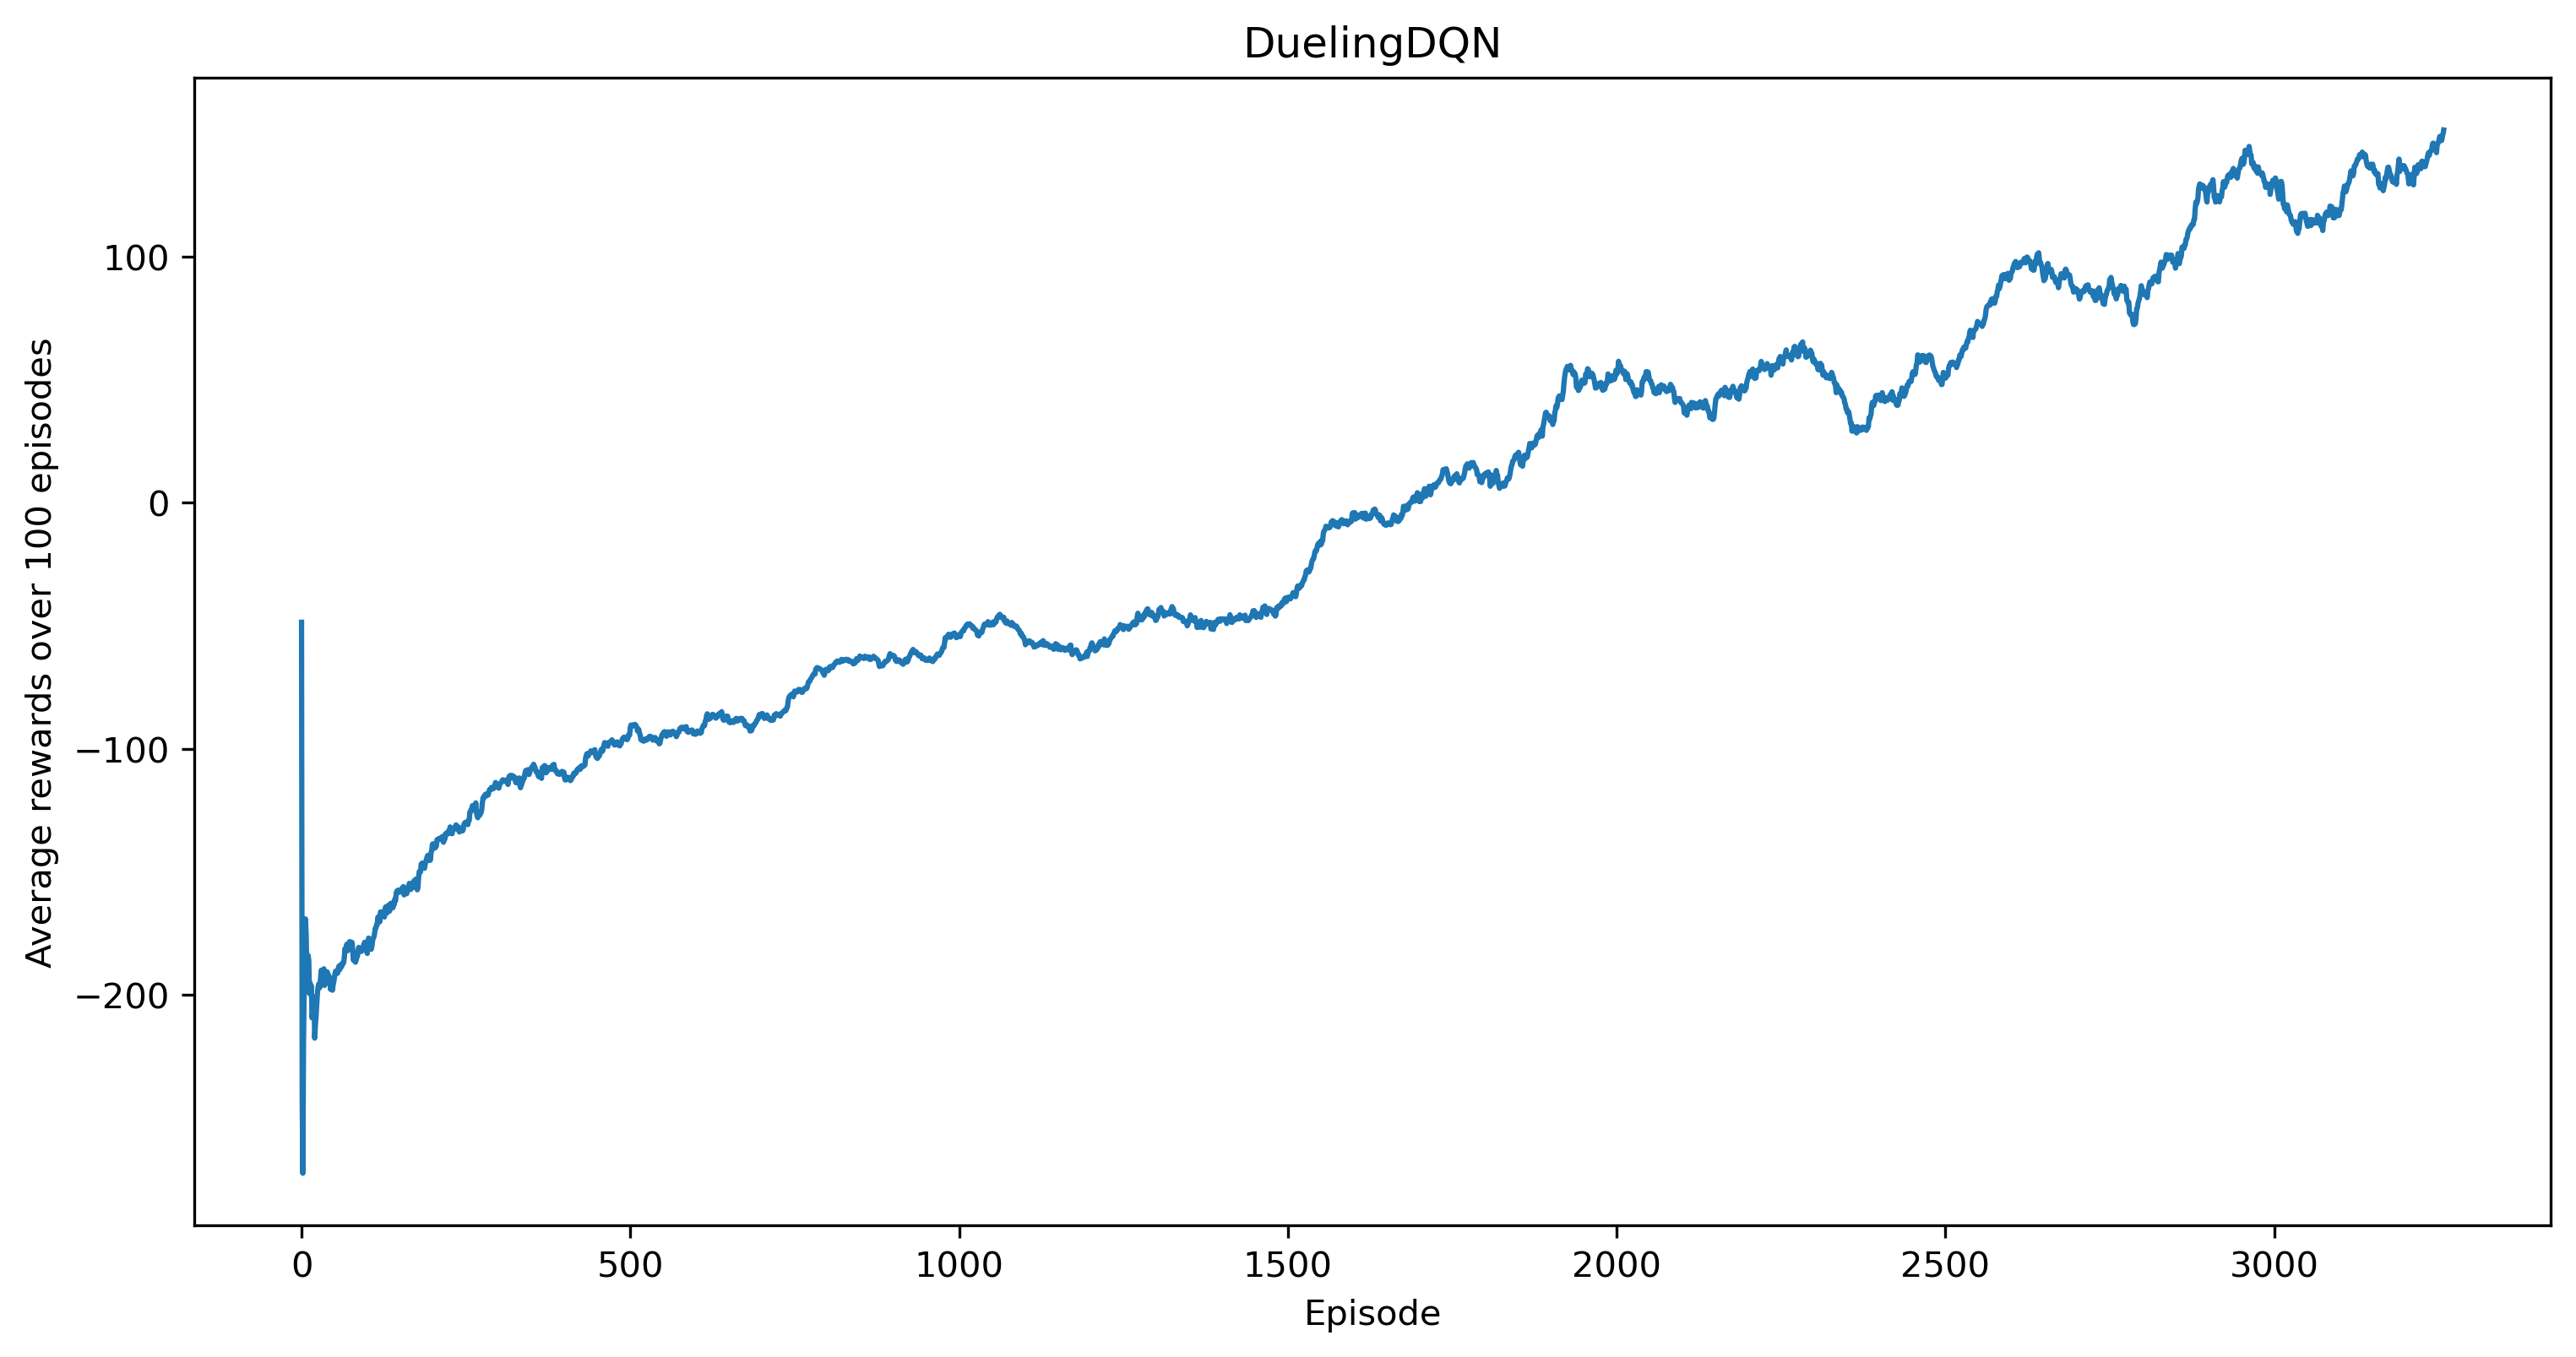

In [11]:
plot_single(df_duelingdqn_200['avg_scores'], "DuelingDQN")

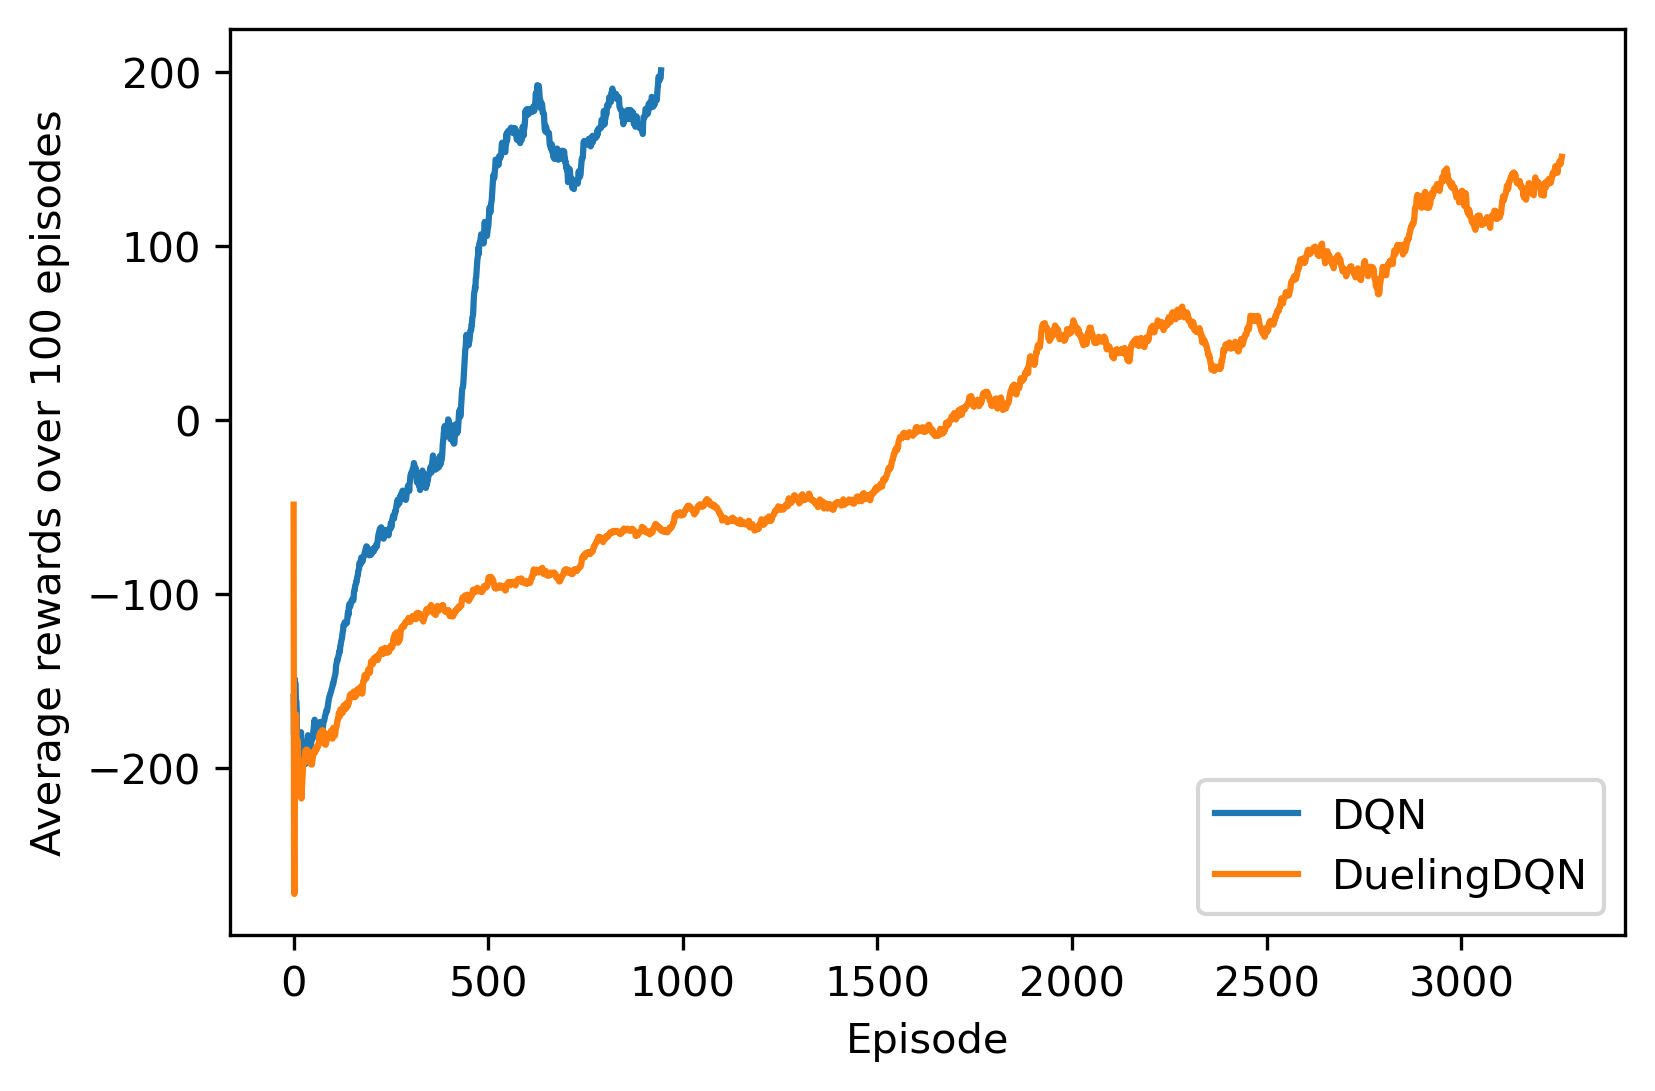

In [12]:
plt.figure(figsize=(6, 4), dpi=300)
plt.plot(df_dqn_200['avg_scores'], label='DQN')
plt.plot(df_duelingdqn_200['avg_scores'], label='DuelingDQN')
plt.xlabel("Episode")
plt.ylabel("Average rewards over 100 episodes")
plt.legend()
plt.show()

In [13]:
df_duelingdqn_200['avg_scores'][-10:]

3249    145.853987
3250    146.515045
3251    147.499978
3252    148.779716
3253    148.477175
3254    147.041741
3255    147.230212
3256    148.857368
3257    149.835962
3258    151.379431
Name: avg_scores, dtype: float64